
$\mu1=[0,0]$

$\mu2=[2,4]$
$
\Sigma1=
\left\{
  \begin{matrix}
   2 & 1  \\
   1 & 2 \\
  \end{matrix} \tag{1}
\right\}
$

$
\Sigma2=
\left\{
  \begin{matrix}
   2 & 1.5  \\
   1.5 & 2 \\
  \end{matrix} \tag{1}
\right\}
$

$P(C1|x)=P(C2|x)$

$P(x|C1)P(C1)=P(x|C2)P(C2)$

$P(C1)=0.6$

$P(C2)=0.4$


In [62]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

# Generating Random sample

In [49]:
mean = [0, 0]
cov = [[2, 1], [1, 2]]
train_x1,train_x2 = np.random.multivariate_normal(mean, cov, 13).T
train=[]
for i in range(len(train_x1)):
    train.append((train_x1[i],train_x2[i],1))
mean = [2, 4]
cov = [[2, 1.5], [1.5, 2]]
train_x1,train_x2 = np.random.multivariate_normal(mean, cov, 7).T
for i in range(len(train_x1)):
    train.append((train_x1[i],train_x2[i],2))
train_array=np.array(train)

In [50]:
mean = [0, 0]
cov = [[2, 1], [1, 2]]
test_x1,test_x2 = np.random.multivariate_normal(mean, cov, 6).T
test=[]
for i in range(len(test_x1)):
    test.append((test_x1[i],test_x2[i],1))
mean = [2, 4]
cov = [[2, 1.5], [1.5, 2]]
test_x1,test_x2 = np.random.multivariate_normal(mean, cov, 4).T
for i in range(len(test_x1)):
    test.append((test_x1[i],test_x2[i],2))
test_array=np.array(test)

# optimal Bayes error rate

In [57]:
predict=[]
err=0
for i in test:
    y=5*i[0]**2+24*i[0]+5*i[1]**2-60*i[1]-11*i[1]*i[0]+96-21*math.log((4/math.sqrt(21)),math.e)
    if y>=0:
        pre=1
    else:
        pre=2
    predict.append((i,pre))
    if i[2]!=pre:
        err+=1
print "optimal Bayes error rate is:", err

optimal Bayes error rate is: 0


# Calculate mean and variance 

In [58]:
c1_train=[]
c2_train=[]
for i in train:
    if i[2]==1:
        c1_train.append((i[0],i[1]))
    else:
        c2_train.append((i[0],i[1]))
c1=np.array(c1_train)
c2=np.array(c2_train)
        
sumx1_c1=0
for i in c1_train:
    sumx1_c1+=i[0]
sumx1_c1=sumx1_c1/len(c1_train)
sumx2_c1=0
for i in c1_train:
    sumx2_c1+=i[1]
sumx2_c1=sumx2_c1/len(c1_train)

sumx1_c2=0
for i in c2_train:
    sumx1_c2+=i[0]
sumx1_c2=sumx1_c2/len(c2_train)
sumx2_c2=0
for i in c2_train:
    sumx2_c2+=i[1]
sumx2_c2=sumx2_c2/len(c1_train)
u1=np.array([sumx1_c1,sumx2_c1])
data_mean_1=c1-u1
u2=np.array([sumx1_c2,sumx2_c2])
data_mean_2=c2-u2
Sw=data_mean_1.T.dot(data_mean_1)+data_mean_2.T.dot(data_mean_2)
Sw1=data_mean_1.T.dot(data_mean_1)
Sw2=data_mean_2.T.dot(data_mean_2)

# LDA

In [59]:
def LDA(u,x,k):
    y=np.dot(np.dot(x.T,Sw**(-1)),u)-0.5*np.dot(np.dot(u.T,Sw**(-1)),u)+math.log(k)
    return y
test_array=np.array(test)
result=[]
err=0
for i in test_array:
    C1=LDA(u1,i[0:2],0.6)
    C2=LDA(u2,i[0:2],0.4)
    #print C1,C2
    if C1>C2:
        pre=1
    else:
        pre=2
    if pre!=i[2]:
        err+=1
    result.append((pre,i[2]))
print "LDA error rate:",err

LDA error rate: 1


# QDA

In [54]:
Sw1=data_mean_1.T.dot(data_mean_1)
Sw2=data_mean_2.T.dot(data_mean_2)
def QDA(u,Sw,x,k):
    y=-0.5*math.log(np.linalg.det(Sw))-0.5*(x-u).T.dot(Sw**(-1)).dot(x-u)+math.log(k)
    return y
result=[]
err=0
for i in test_array:
    #print i
    C1=QDA(u1,Sw1,i[0:2],0.6)
    C2=QDA(u2,Sw2,i[0:2],0.4)
    if C1>C2:
        pre=1
    else:
        pre=2
    if pre!=i[2]:
        err+=1
    result.append((pre,i[2]))
print err

0


# Regularized discriminant analysis. Plot the misclassification rate of both the train data and the test data as a function of α.

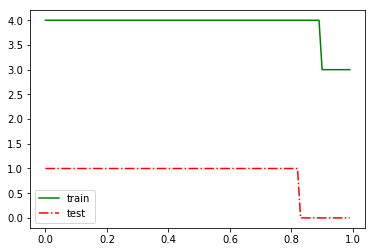

In [60]:
def RDA(a,u,Swi,Sw,x,k):
    Sw_R=a*Swi+(1-a)*Sw
    y=-0.5*math.log(np.linalg.det(Sw_R))-0.5*(x-u).T.dot(Sw_R**(-1)).dot(x-u)+math.log(k)
    return y
a=[]
for i in range(100):
    a.append(0+0.01*i)
    
def err_rate(x):    
    result=[]
    for i in a:
        err=0
        for j in x:
            C1=RDA(i,u1,Sw1,Sw,j[0:2],0.6)
            C2=RDA(i,u2,Sw2,Sw,j[0:2],0.4)
            if C1>C2:
                pre=1
            else:
                pre=2
            if pre!=j[2]:
                err+=1
        result.append(err)
    return result

train_error=err_rate(train_array)
test_error=err_rate(test_array)
import matplotlib.pyplot as plt
plt.plot(a,train_error,"g-",label="train")
plt.plot(a,test_error,"r-.",label="test")
plt.legend()
plt.show()



As shown on the graph, training data has higher err-rate than test data. With the increase of α, the err rate of both training and test data decrease.